# NB: Narrow vs Wide Tables

There are in general at least two ways to represent a dataset -- as a narrow table or as a set of wide tables.

Let's look at a very simple example.

In [3]:
import pandas as pd

In [4]:
pets = pd.Series("cat dog ferret snake turtle parraot".split()).sample(1000, replace=True).to_list()
people = pd.Series("A B C D E F G".split()).sample(1000, replace=True).to_list()   
NARROW = pd.DataFrame(dict(pet=pets, owner=people)).groupby(['owner', 'pet']).pet.count().to_frame('n')

This is a narrow table. 

It has few columns and many rows. 

Columns are types of things, and values in rows are either instances or subtypes.

In [5]:
NARROW

n
owner pet        
A     cat      21
      dog      30
      ferret   23
      parraot  28
      snake    17
      turtle   23
B     cat      25
      dog      28
      ferret   27
      parraot  24
      snake    27
      turtle   22
C     cat      23
      dog      18
      ferret   33
      parraot  23
      snake    20
      turtle   23
D     cat      28
      dog      17
      ferret   25
      parraot  26
      snake    24
      turtle   21
E     cat      29
      dog      19
      ferret   24
      parraot  26
      snake    24
      turtle   23
F     cat      19
      dog      25
      ferret   15
      parraot  25
      snake    26
      turtle   23
G     cat      29
      dog      21
      ferret   18
      parraot  23
      snake    28
      turtle   27

In [6]:
WIDE = NARROW.n.unstack()

This is a wide table. 

One column's values are projected onto the feature space (as columns).

The other column becomes a unique list (as is the feature space).

In [7]:
WIDE

pet,cat,dog,ferret,parraot,snake,turtle
owner,,,,,,
A,21,30,23,28,17,23
B,25,28,27,24,27,22
C,23,18,33,23,20,23
D,28,17,25,26,24,21
E,29,19,24,26,24,23
F,19,25,15,25,26,23
G,29,21,18,23,28,27


Narrow columns are more manageable by databases.

In fact, relational databases impose a limit on the number of columns you can have for a table, excluding high-dimensional spaces.

Wide columns are more usable for analysis.

You can do also these things with narrow tables using `.group_by()`

In [8]:
A = WIDE / WIDE.sum()

In [9]:
B = WIDE.T / WIDE.T.sum()

In [10]:
A.style.background_gradient()

pet,cat,dog,ferret,parraot,snake,turtle
owner,,,,,,
A,0.120690,0.189873,0.139394,0.160000,0.102410,0.141975
B,0.143678,0.177215,0.163636,0.137143,0.162651,0.135802
C,0.132184,0.113924,0.200000,0.131429,0.120482,0.141975
D,0.160920,0.107595,0.151515,0.148571,0.144578,0.129630
E,0.166667,0.120253,0.145455,0.148571,0.144578,0.141975
F,0.109195,0.158228,0.090909,0.142857,0.156627,0.141975
G,0.166667,0.132911,0.109091,0.131429,0.168675,0.166667


In [11]:
B.style.background_gradient()

owner,A,B,C,D,E,F,G
pet,,,,,,,
cat,0.147887,0.163399,0.164286,0.198582,0.200000,0.142857,0.198630
dog,0.211268,0.183007,0.128571,0.120567,0.131034,0.187970,0.143836
ferret,0.161972,0.176471,0.235714,0.177305,0.165517,0.112782,0.123288
parraot,0.197183,0.156863,0.164286,0.184397,0.179310,0.187970,0.157534
snake,0.119718,0.176471,0.142857,0.170213,0.165517,0.195489,0.191781
turtle,0.161972,0.143791,0.164286,0.148936,0.158621,0.172932,0.184932


In [12]:
NARROW.unstack()

n                                
pet   cat dog ferret parraot snake turtle
owner                                    
A      21  30     23      28    17     23
B      25  28     27      24    27     22
C      23  18     33      23    20     23
D      28  17     25      26    24     21
E      29  19     24      26    24     23
F      19  25     15      25    26     23
G      29  21     18      23    28     27

## 1 Hot Encoding

Project values onto the column axis.

In [13]:
# pd.get_dummies?

In [14]:
pd.get_dummies(WIDE.cat)

,19,21,23,25,28,29
owner,,,,,,
A,False,True,False,False,False,False
B,False,False,False,True,False,False
C,False,False,True,False,False,False
D,False,False,False,False,True,False
E,False,False,False,False,False,True
F,True,False,False,False,False,False
G,False,False,False,False,False,True


In [15]:
pd.get_dummies(NARROW.n)

15     17     18     19     20     21     22     23     24  \
owner pet                                                                      
A     cat      False  False  False  False  False   True  False  False  False   
      dog      False  False  False  False  False  False  False  False  False   
      ferret   False  False  False  False  False  False  False   True  False   
      parraot  False  False  False  False  False  False  False  False  False   
      snake    False   True  False  False  False  False  False  False  False   
      turtle   False  False  False  False  False  False  False   True  False   
B     cat      False  False  False  False  False  False  False  False  False   
      dog      False  False  False  False  False  False  False  False  False   
      ferret   False  False  False  False  False  False  False  False  False   
      parraot  False  False  False  False  False  False  False  False   True   
      snake    False  False  False  False  False  False  False  False  False   
      turtle   False  False  False  False  False  False   True  False  False   
C     cat      False  False  False  False  False  False  False   True  False   
      dog      False  False   True  False  False  False  False  False  False   
      ferret   False  False  False  False  False  False  False  False  False   
      parraot  False  False  False  False  False  False  False   True  False   
      snake    False  False  False  False   True  False  False  False  False   
      turtle   False  False  False  False  False  False  False   True  False   
D     cat      False  False  False  False  False  False  False  False  False   
      dog      False   True  False  False  False  False  False  False  False   
      ferret   False  False  False  False  False  False  False  False  False   
      parraot  False  False  False  False  False  False  False  False  False   
      snake    False  False  False  False  False  False  False  False   True   
      turtle   False  False  False  False  False   True  False  False  False   
E     cat      False  False  False  False  False  False  False  False  False   
      dog      False  False  False   True  False  False  False  False  False   
      ferret   False  False  False  False  False  False  False  False   True   
      parraot  False  False  False  False  False  False  False  False  False   
      snake    False  False  False  False  False  False  False  False   True   
      turtle   False  False  False  False  False  False  False   True  False   
F     cat      False  False  False   True  False  False  False  False  False   
      dog      False  False  False  False  False  False  False  False  False   
      ferret    True  False  False  False  False  False  False  False  False   
      parraot  False  False  False  False  False  False  False  False  False   
      snake    False  False  False  False  False  False  False  False  False   
      turtle   False  False  False  False  False  False  False   True  False   
G     cat      False  False  False  False  False  False  False  False  False   
      dog      False  False  False  False  False   True  False  False  False   
      ferret   False  False   True  False  False  False  False  False  False   
      parraot  False  False  False  False  False  False  False   True  False   
      snake    False  False  False  False  False  False  False  False  False   
      turtle   False  False  False  False  False  False  False  False  False   

                  25     26     27     28     29     30     33  
owner pet                                                       
A     cat      False  False  False  False  False  False  False  
      dog      False  False  False  False  False   True  False  
      ferret   False  False  False  False  False  False  False  
      parraot  False  False  False   True  False  False  False  
      snake    False  False  False  False  False  False  False  
      turtle   False  False  False  False 

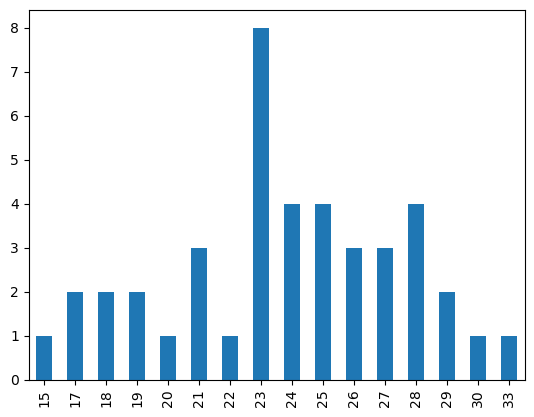

In [16]:
pd.get_dummies(NARROW.n).sum().plot.bar();